In [1]:
##Importamos las librerias correspondientes, antes se instalaron con pip install - pandas, numpy, matplot...etc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np  
import missingno as msno
import ast
import json



sns.set_theme(color_codes= True)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("max_colwidth", 100)

In [2]:
##Leemos los archivos csv con pandas
df_Movies = pd.read_csv('DATA/movies_dataset.csv')
df_credits = pd.read_csv('DATA/credits.csv')

C:\Users\Raksasa\AppData\Local\Temp\ipykernel_208\3818548.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Movies = pd.read_csv('DATA/movies_dataset.csv')


In [3]:
df_Movies.shape

(45466, 24)

In [4]:
df_credits.shape

(45504, 3)

In [5]:
df_Movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Inters...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [6]:
df_credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",8844


In [7]:
df_Movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [8]:
df_Movies.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [9]:
df_credits.isnull().sum()

cast     1
crew    11
id      28
dtype: int64

In [10]:
df_Movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [11]:
df_credits.dtypes

cast    object
crew    object
id      object
dtype: object

## Preprocesando los datos 

In [12]:
def cambiar_valores_tabla(df):
    # Obtener los valores de las columnas originales en las filas específicas
    values = df_Movies.loc[[19730, 29503, 35587], 'adult':'release_date']

    # Copiar los valores a las celdas correspondientes de las columnas deseadas
    df_Movies.loc[[19730, 29503, 35587], 'overview':'vote_count'] = values.values

    # Dejar en blanco las celdas desde 'adult' hasta 'original_title'
    df_Movies.loc[[19730, 29503, 35587], 'adult':'original_title'] = ''

    # Retornar el DataFrame modificado
    return df_Movies

In [13]:
df_Movies = cambiar_valores_tabla(df_Movies)

In [14]:
print(df_Movies.loc[[19730,29503,35587]])

      adult belongs_to_collection budget genres homepage id imdb_id  \
19730                                                                 
29503                                                                 
35587                                                                 

      original_language original_title  \
19730                                    
29503                                    
35587                                    

                                                                                                  overview  \
19730                                                                                   - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the October corporation to try to wrap up her case onc...   
35587   Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when i...   

      popularity                       poster_path  \
19730   0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg 

In [15]:
df_Movies.loc[[19730,29503,35587]]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,,,,,,,,,,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}, {'name': 'Vision View Entertainment', 'id': 1160...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso_3166_1': 'LU', 'name': 'Luxembourg'}, {'iso_3166_...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1
29503,,,,,,,,,,Rune Balot goes to a casino connected to the October corporation to try to wrap up her case onc...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'GoHands', 'id': 7759}, {'name': 'BROSTA TV', 'id': 7...","[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'JP', 'name': 'Japan'}]",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12
35587,,,,,,,,,,Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when i...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'name': 'Pulser Productions', 'id': 18012}, {'name': '...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22


In [16]:
df_Movies['id'] = pd.to_numeric(df_Movies['id'], errors='coerce')
df_credits['id'] = pd.to_numeric(df_credits['id'], errors='coerce')
df_Movies_credits = pd.merge(df_Movies, df_credits, on='id', how='inner')
df_Movies_credits.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",http://toystory.disney.com/toy-story,862.0,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",NaN,8844.0,tt0113497,en,Jumanji,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Inters...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '..."


In [17]:
df_Movies_credits.shape

(45678, 26)

In [18]:
df_Movies_credits.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                       float64
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                   object
runtime                   object
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average              object
vote_count                object
cast                      object
crew                      object
dtype: object

<AxesSubplot: >

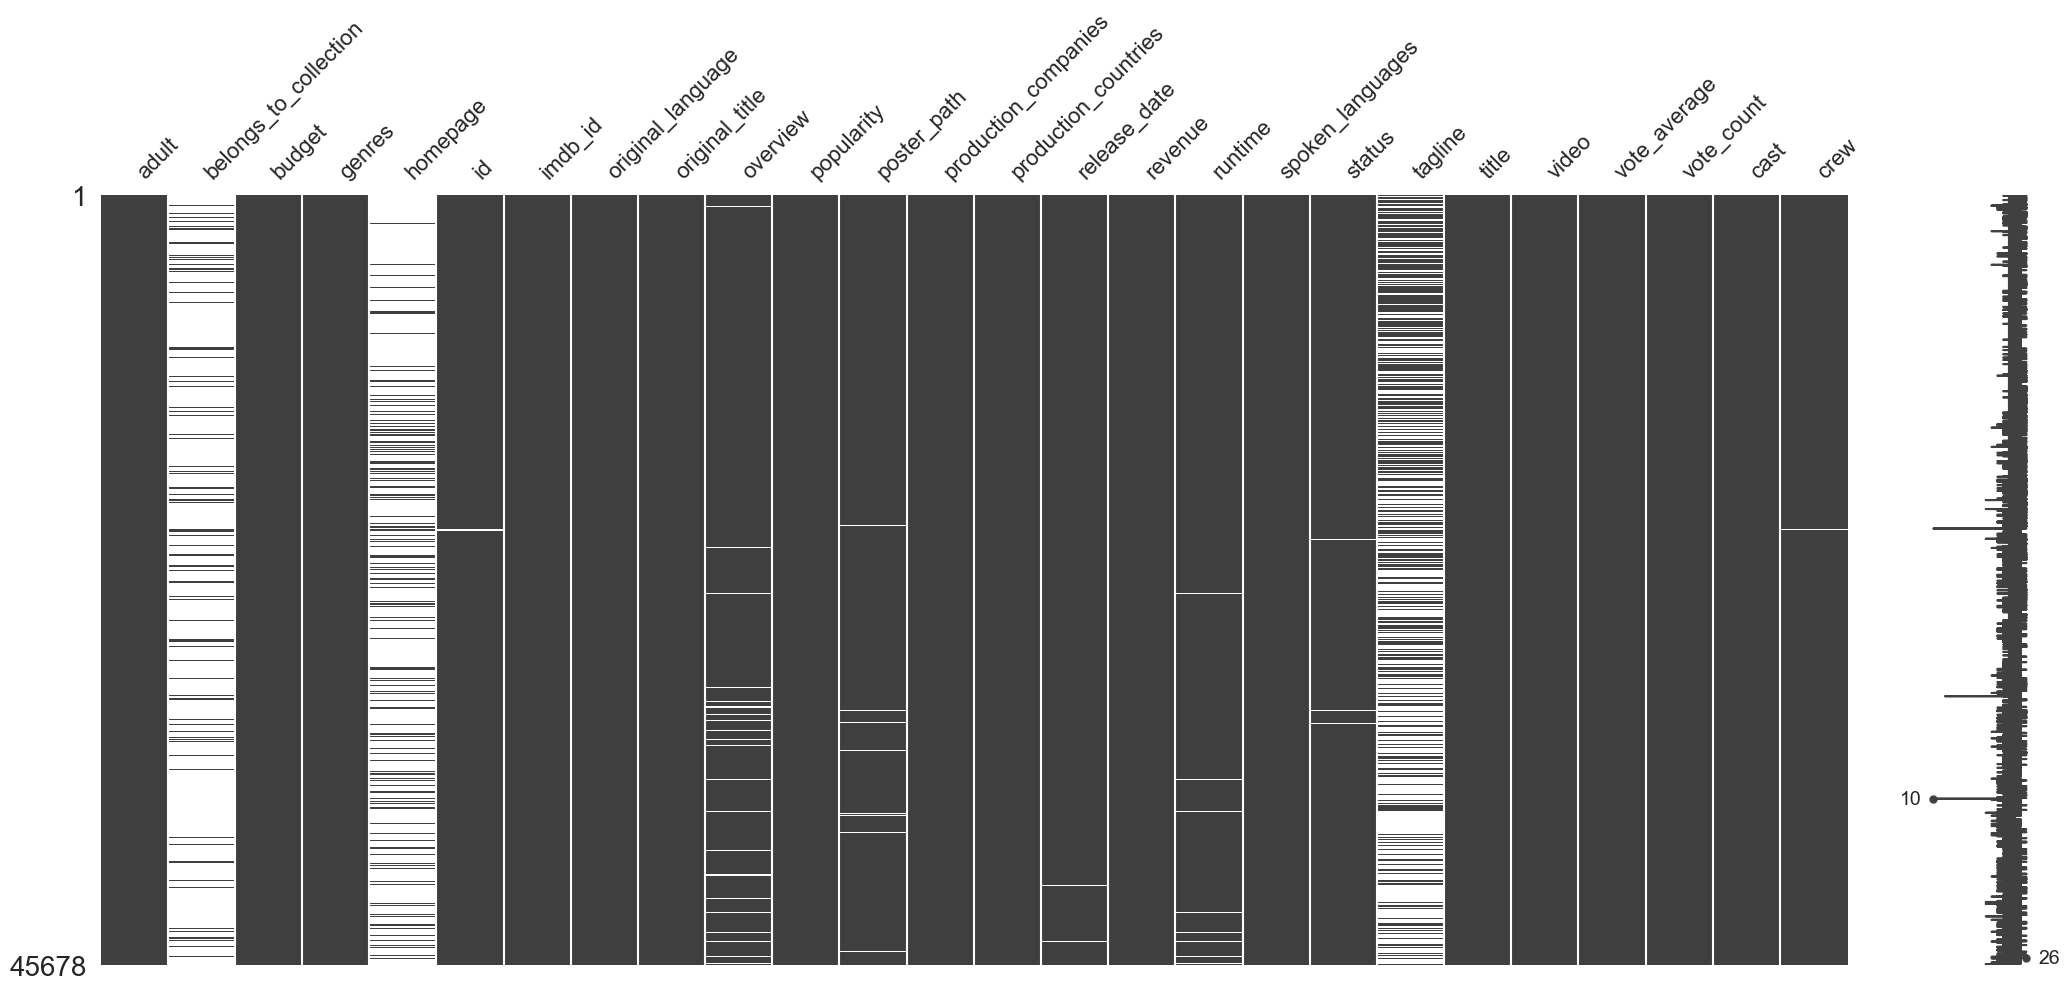

In [19]:
msno.matrix(df_Movies_credits)

In [20]:
# Eliminar las columnas no utilizadas
columns_to_drop = ['video', 'imdb_id', 'adult', 'original_title', 'poster_path', 'homepage']
df_Movies_credits.drop(columns=columns_to_drop, inplace=True)

In [21]:
counts_valores_nul = df_Movies_credits.isnull().sum()
counts_valores_nul

belongs_to_collection    41021
budget                       0
genres                       0
id                         168
original_language           11
overview                   954
popularity                   3
production_companies         3
production_countries         3
release_date                87
revenue                      3
runtime                    260
spoken_languages             3
status                      84
tagline                  25209
title                        3
vote_average                 3
vote_count                   3
cast                         3
crew                        33
dtype: int64

## Los valores nulos del campo release date deben eliminarse.



In [22]:
#Elimina los datos NaN en la columna 'release_date'
df_Movies_credits.dropna(subset=['release_date'], inplace=True)

## De haber fechas, deberán tener el formato AAAA-mm-dd, además deberán crear la columna release_year donde extraerán el año de la fecha de estreno.

In [23]:
# Crear la columna "release_year" con el año de la fecha de estreno
df_Movies_credits['release_year'] = pd.to_datetime(df_Movies_credits['release_date']).dt.year

## Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0.

In [24]:
# Convertir los campos "revenue" y "budget" al tipo numérico
df_Movies_credits['revenue'] = pd.to_numeric(df_Movies_credits['revenue'], errors='coerce')
df_Movies_credits['budget'] = pd.to_numeric(df_Movies_credits['budget'], errors='coerce')
# Crear la columna "return" con el cálculo del retorno de inversión
df_Movies_credits['return'] = df_Movies_credits.apply(lambda row: row['revenue'] / row['budget'] if pd.notnull(row['revenue']) and pd.notnull(row['budget']) and row['budget'] != 0 else 0, axis=1)
df_Movies_credits['return'] = df_Movies_credits['return'].round(2)


## Los valores nulos de los campos revenue, budget deben ser rellenados por el número 0.

## ETL 

In [25]:
# Definir la lista de imputados
lista_imputados = [{'Sin Datos'}]

# Llenar los valores faltantes en columnas numéricas con 0
df_Movies_credits['revenue'].fillna(0, inplace=True)
df_Movies_credits['budget'].fillna(0, inplace=True)
df_Movies_credits['runtime'].fillna(0, inplace=True)

# Llenar los valores faltantes en las siguientes columnas con la lista de imputados
df_Movies_credits['release_date'] = df_Movies_credits['release_date'].fillna(method='ffill')
df_Movies_credits['belongs_to_collection'] = df_Movies_credits['belongs_to_collection'].apply(lambda x: lista_imputados if pd.isnull(x) else x)
df_Movies_credits['status'] = df_Movies_credits['status'].apply(lambda x: lista_imputados if pd.isnull(x) else x)
df_Movies_credits['overview'] = df_Movies_credits['overview'].apply(lambda x: lista_imputados if pd.isnull(x) else x)
df_Movies_credits['tagline'] = df_Movies_credits['tagline'].apply(lambda x: lista_imputados if pd.isnull(x) else x)
df_Movies_credits['original_language'] = df_Movies_credits['original_language'].apply(lambda x: lista_imputados if pd.isnull(x) else x)

# Convertir las columnas a cadenas de texto para eliminar el ".0" al final de los valores enteros
df_Movies_credits['id'] = df_Movies_credits['id'].astype(str).str.rstrip('.0')
df_Movies_credits['budget'] = df_Movies_credits['budget'].astype(str).apply(lambda x: x.split(".")[0])
df_Movies_credits['revenue'] = df_Movies_credits['revenue'].astype(str).apply(lambda x: x.split(".")[0])

# Eliminar el ".0" al final de los valores enteros en las columnas 'runtime' y 'vote_count'
df_Movies_credits['runtime'] = df_Movies_credits['runtime'].replace('', 0).astype(float).astype(int).astype(str)
df_Movies_credits['vote_count'] = df_Movies_credits['vote_count'].replace('', 0).astype(float).astype(int).astype(str)

# Convertir la columna "popularity" a tipo numérico (float) antes de redondearla
df_Movies_credits['popularity'] = df_Movies_credits['popularity'].astype(float).apply(lambda x: round(x, 2) if not pd.isnull(x) else x)

# Imprimir el DataFrame resultante
df_Movies_credits.head(2)


,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862,en,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,[{Sin Datos}],Toy Story,7.7,5415,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",1995,12.45
1,[{Sin Datos}],65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",8844,en,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Inters...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",1995,4.04


In [26]:
valores_nul = df_Movies_credits.isnull().sum()
valores_nul

belongs_to_collection     0
budget                    0
genres                    0
id                        0
original_language         0
overview                  0
popularity                0
production_companies      0
production_countries      0
release_date              0
revenue                   0
runtime                   0
spoken_languages          0
status                    0
tagline                   0
title                     0
vote_average              0
vote_count                0
cast                      3
crew                     33
release_year              0
return                    0
dtype: int64

<AxesSubplot: >

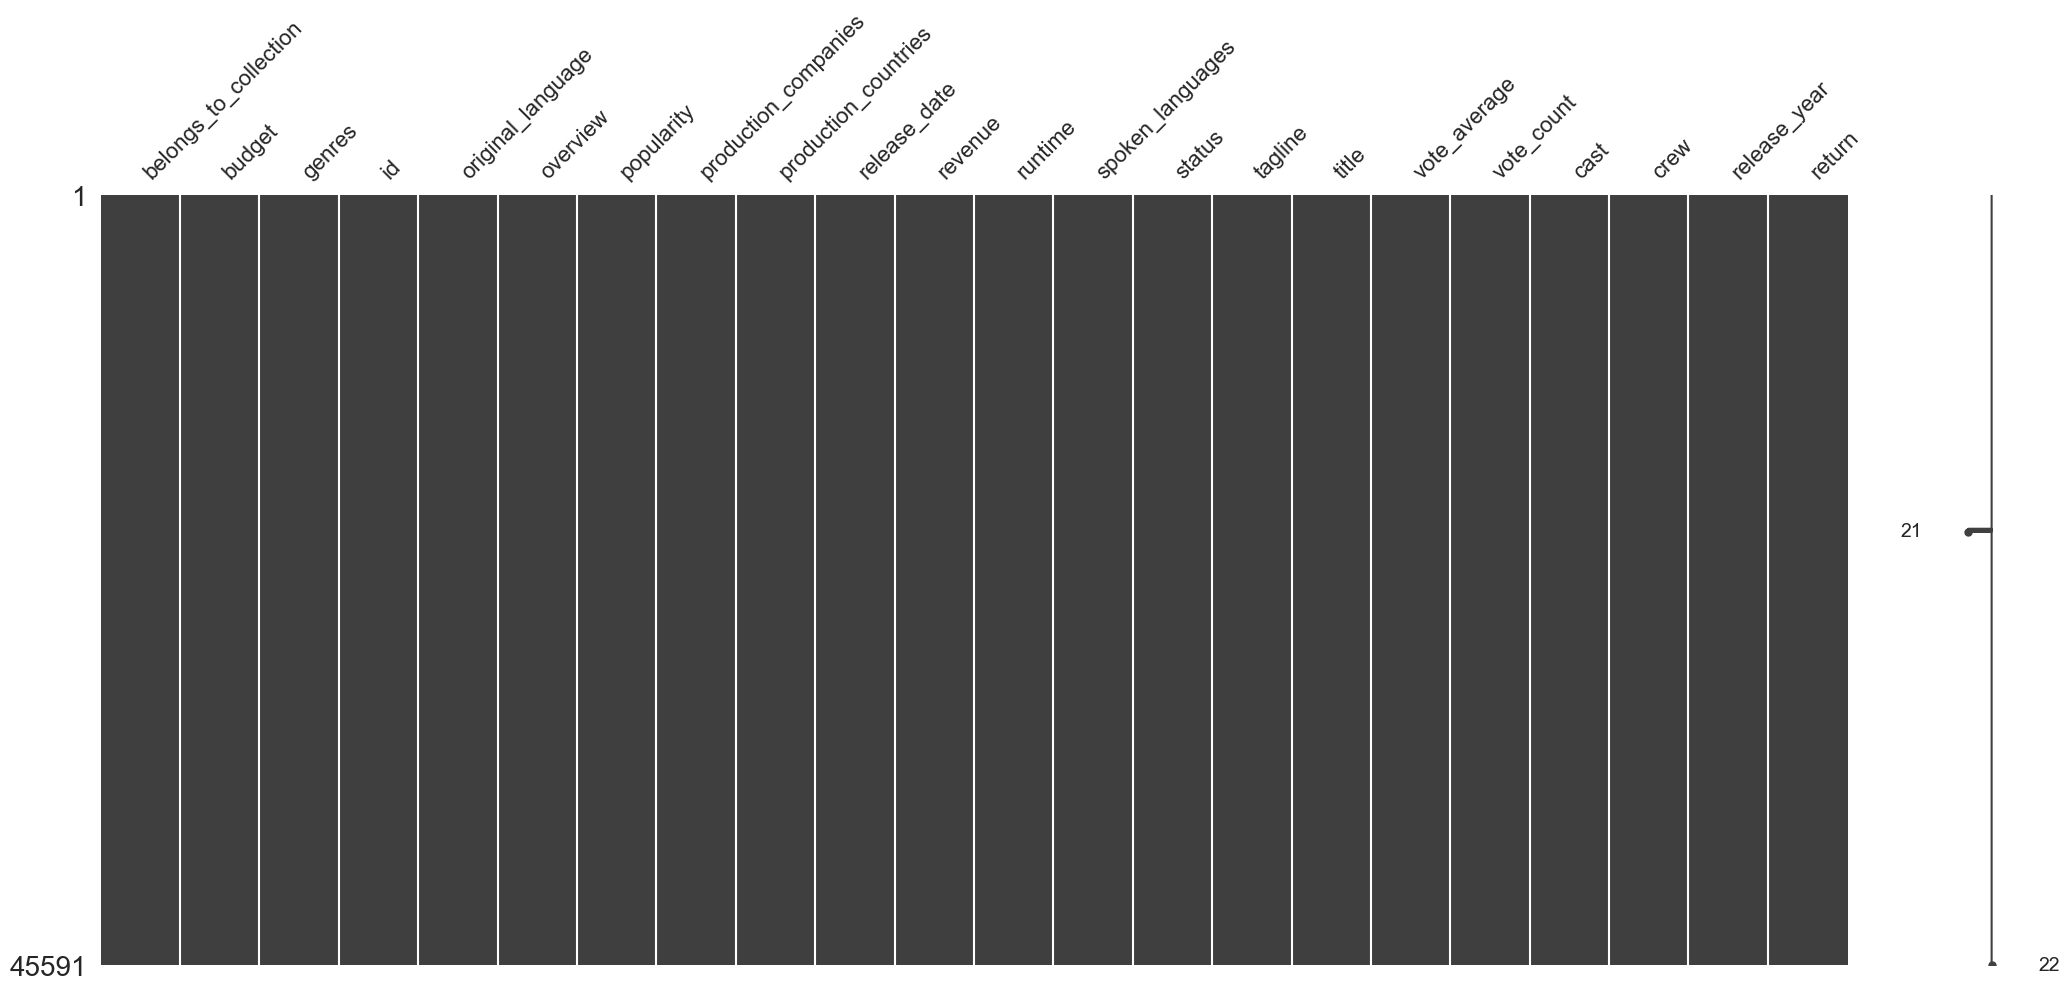

In [27]:
msno.matrix(df_Movies_credits)

In [28]:
df_Movies.shape

(45466, 24)

In [29]:
df_Movies_credits.head(1)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return
0,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862,en,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,[{Sin Datos}],Toy Story,7.7,5415,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",1995,12.45


In [30]:
def obtener_nombre_mes(mes):
    nombres_meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
                     'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
    return nombres_meses[mes - 1]

def obtener_nombre_dia(dia):
    nombres_dias = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
    return nombres_dias[dia]

def procesar_dataframe(df_Movies_credits):
    df_Movies_credits['release_date'] = pd.to_datetime(df_Movies_credits['release_date'])
    df_Movies_credits['mes'] = df_Movies_credits['release_date'].dt.month.map(obtener_nombre_mes)
    df_Movies_credits['dia'] = df_Movies_credits['release_date'].dt.dayofweek.map(obtener_nombre_dia)

procesar_dataframe(df_Movies_credits)
df_Movies_credits.head(2)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return,mes,dia
0,"{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",862,en,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.95,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-10-30,373554033,81,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,[{Sin Datos}],Toy Story,7.7,5415,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",1995,12.45,octubre,lunes
1,[{Sin Datos}],65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",8844,en,When siblings Judy and Peter discover an enchanted board game that opens the door to a magical w...,17.02,"[{'name': 'TriStar Pictures', 'id': 559}, {'name': 'Teitler Film', 'id': 2550}, {'name': 'Inters...","[{'iso_3166_1': 'US', 'name': 'United States of America'}]",1995-12-15,262797249,104,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413,"[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': ...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, '...",1995,4.04,diciembre,viernes


In [31]:
#columnas_borrar = ['original_language','overview', 'production_countries','spoken_languages', 'tagline' ]

#df_Movies_credits = df_Movies_credits.drop(columnas_borrar, axis=1)

#n_filas_a_eliminar = 5000  

# Utiliza el método "drop" para eliminar las últimas n filas
#df_Movies_credits = df_Movies_credits.drop(df_Movies_credits.tail(n_filas_a_eliminar).index)

In [32]:
df_Movies_credits.to_csv('DATA/df_fechafinal.csv', index=False)

In [33]:
df_Movies_credits.shape


(45591, 24)

In [34]:
#Creamos las funciones necesarias para desanidar los datos anidados

def desanidar_columnas(dataframe, columnas):
    desanidados = {}
    for columna in columnas:
        nueva_columna = columna + "_desanidada"
        desanidados[nueva_columna] = []
        for valor in dataframe[columna]:
            desanidados[nueva_columna].append(desanidar_valor(valor))
    return desanidados


def desanidar_valor(valor):
    if isinstance(valor, dict):
        return desanidar_diccionario(valor)
    elif isinstance(valor, list):
        return desanidar_lista(valor)
    else:
        return valor

def desanidar_diccionario(diccionario):
    desanidado = {}
    for clave, valor in diccionario.items():
        if isinstance(valor, dict):
            desanidado[clave] = desanidar_diccionario(valor)
        elif isinstance(valor, list):
            desanidado[clave] = desanidar_lista(valor)
        else:
            desanidado[clave] = valor
    return desanidado

def desanidar_lista(lista):
    desanidado = []
    for elemento in lista:
        if isinstance(elemento, dict):
            desanidado.append(desanidar_diccionario(elemento))
        elif isinstance(elemento, list):
            desanidado.append(desanidar_lista(elemento))
        else:
            desanidado.append(elemento)
    return desanidado

#Creamos una función para agregar las columnas desanidadas

def agregar_columnas_desanidadas(df, columnas_anidadas):
    # Creamos una copia del DataFrame original
    df_modificado = df.copy()

    # Recorremos las columnas desanidadas y agregamos una a la vez al DataFrame copiado 'df_modificado'
    for columna in columnas_anidadas:
        valores = df_modificado[columna]
        df_modificado[columna + "_desanidada"] = pd.Series(valores)

    # Devolver el DataFrame modificado
    return df_modificado

def eliminar_columnas(dataframe, columnas):
    dataframe.drop(columns=columnas, inplace=True)
    return dataframe


#Creamos una función para transformar los datos y quitar el .0 de los valores de las columnas
def formatear_columnas(dataframe, *columnas):
    for columna in columnas:
        dataframe[columna] = dataframe[columna].fillna(0).astype(float).astype(int).astype(str)
        dataframe[columna] = dataframe[columna].str.replace('.0', '')
    return dataframe

In [35]:
import ast

def desanidar_crew(crews):
    crews_id = []
    crews_department = []
    crews_gender = []
    crews_id_M = []
    crews_job = []
    crews_name = []
    crews_profile_path = []

    for crew in crews:
        crews_id.append(crew.get('credit_id'))
        crews_department.append(crew.get('department'))
        crews_gender.append(crew.get('gender'))
        crews_id_M.append(crew.get('id'))
        crews_job.append(crew.get('job'))
        crews_name.append(crew.get('name'))
        crews_profile_path.append(crew.get('profile_path'))

    return crews_id, crews_department, crews_gender, crews_id_M, crews_job, crews_name, crews_profile_path

def parse_crew_data(x):
    try:
        crews = ast.literal_eval(x)
        return desanidar_crew(crews)
    except (SyntaxError, ValueError):
        return ([], [], [], [], [], [], [])

generos_desanidados = df_Movies_credits['crew'].apply(parse_crew_data)

nuevo_df_movies = pd.DataFrame(generos_desanidados.tolist(), columns=['crews_id','crews_department','crews_gender','crews_id_M','crews_job','crews_name','crews_profile_path'])

nuevo_df_movies = nuevo_df_movies.apply(pd.Series.explode)
nuevo_df_movies = nuevo_df_movies.reset_index(drop=True)

nuevo_df_movies.head()


,crews_id,crews_department,crews_gender,crews_id_M,crews_job,crews_name,crews_profile_path
0,52fe4284c3a36847f8024f49,Directing,2,7879,Director,John Lasseter,/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg
1,52fe4284c3a36847f8024f4f,Writing,2,12891,Screenplay,Joss Whedon,/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg
2,52fe4284c3a36847f8024f55,Writing,2,7,Screenplay,Andrew Stanton,/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg
3,52fe4284c3a36847f8024f5b,Writing,2,12892,Screenplay,Joel Cohen,/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg
4,52fe4284c3a36847f8024f61,Writing,0,12893,Screenplay,Alec Sokolow,/v79vlRYi94BZUQnkkyznbGUZLjT.jpg


In [36]:
nuevo_df_movies.to_csv('DATA/df_crewfinal.csv', index=False)

In [37]:
print(df_Movies_credits['crew'].iloc[1])

[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'department': 'Production', 'gender': 2, 'id': 511, 'job': 'Executive Producer', 'name': 'Larry J. Franco', 'profile_path': None}, {'credit_id': '52fe44bfc3a36847f80a7c89', 'department': 'Writing', 'gender': 2, 'id': 876, 'job': 'Screenplay', 'name': 'Jonathan Hensleigh', 'profile_path': '/l1c4UFD3g0HVWj5f0CxXAvMAGiT.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cdd', 'department': 'Sound', 'gender': 2, 'id': 1729, 'job': 'Original Music Composer', 'name': 'James Horner', 'profile_path': '/oLOtXxXsYk8X4qq0ud4xVypXudi.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7c7d', 'department': 'Directing', 'gender': 2, 'id': 4945, 'job': 'Director', 'name': 'Joe Johnston', 'profile_path': '/fok4jaO62v5IP6hkpaaAcXuw2H.jpg'}, {'credit_id': '52fe44bfc3a36847f80a7cd7', 'department': 'Editing', 'gender': 2, 'id': 4951, 'job': 'Editor', 'name': 'Robert Dalva', 'profile_path': None}, {'credit_id': '573523bec3a368025100062c', 'department': 'Production', 'gender': 0, 'i

## Eliminar las columnas que no serán utilizadas, video,imdb_id,adult,original_title,poster_path y homepage.



In [38]:
columnas_anidadas = ['genres', 'belongs_to_collection','production_companies','production_countries', 'spoken_languages']
desanidos = desanidar_columnas(df_Movies_credits, columnas_anidadas)

In [39]:
df_movies1 = agregar_columnas_desanidadas(df_Movies_credits, columnas_anidadas)

In [40]:
df_movies1 = eliminar_columnas(df_movies1, [ 'genres', 'belongs_to_collection', 'production_companies', 'production_countries', 'spoken_languages'])


In [41]:
def formatear_columnas(dataframe, *columnas):
    for columna in columnas:
        # Replace NaN and inf with 0
        dataframe[columna] = dataframe[columna].fillna(0).replace([np.inf, -np.inf], 0)
        # Convert the column to float and then to integer
        dataframe[columna] = dataframe[columna].astype(float).astype(int).astype(str)
        dataframe[columna] = dataframe[columna].str.replace('.0', '')
    return dataframe

In [42]:
df_movies1.head(1)

,budget,id,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,cast,crew,release_year,return,mes,dia,genres_desanidada,belongs_to_collection_desanidada,production_companies_desanidada,production_countries_desanidada,spoken_languages_desanidada
0,30000000,862,en,"Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear o...",21.95,1995-10-30,373554033,81,Released,[{Sin Datos}],Toy Story,7.7,5415,"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender'...","[{'credit_id': '52fe4284c3a36847f8024f49', 'department': 'Directing', 'gender': 2, 'id': 7879, '...",1995,12.45,octubre,lunes,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]","{'id': 10194, 'name': 'Toy Story Collection', 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',...","[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States of America'}]","[{'iso_639_1': 'en', 'name': 'English'}]"


In [43]:
#columnas_borrar_1 = ['original_language','overview', 'tagline']

#df_movies1 = df_movies1.drop(columnas_borrar_1, axis=1)

#n_filas_a_eliminar_1 = 5000  

# Utiliza el método "drop" para eliminar las últimas n filas
#df_movies1 = df_movies1.drop(df_movies1.tail(n_filas_a_eliminar_1).index)

In [44]:
df_movies1['crew'] = df_movies1['crew'].str.replace(r'\b\w{24}\b', '', regex=True)


In [45]:
df_movies1['release_date'] = pd.to_datetime(df_movies1['release_date'])


In [46]:
df_movies1.to_csv('DATA/df_movies1.csv', index=False)

In [47]:
# Expandir la columna "genres" en filas
genres_df = df_movies1.explode("genres_desanidada")

# Crear un nuevo DataFrame con las columnas deseadas
movie_genres_df = genres_df[["id", "genres_desanidada"]]

# Guardar el DataFrame en un archivo CSV
movie_genres_df.to_csv("DATA/movie_genres.csv", index=False)

In [48]:
# Assuming df_genre is the DataFrame loaded from "DATA/movie_genres.csv"
df_genre = pd.read_csv("DATA/movie_genres.csv")

# Remove leading zeros and convert 'id' column to numeric, handling non-numeric values
df_genre['id'] = pd.to_numeric(df_genre['id'], errors='coerce').astype('Int64')

df_genre.head()

,id,genres_desanidada
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]"
2,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]"
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]"
4,11862,"[{'id': 35, 'name': 'Comedy'}]"


In [49]:
import ast

def desanidar_generos(genres):
    genero_id = [genero['id'] for genero in genres]
    genero_nombre = [genero['name'] for genero in genres]
    return genero_id, genero_nombre

# Filtrar los valores no nulos en la columna 'genres_desanidada'
generos_desanidados = df_genre['genres_desanidada'].apply(lambda x: desanidar_generos(ast.literal_eval(x)) if pd.notna(x) else ([], []))

# Crear un nuevo DataFrame a partir de los géneros desanidados
nuevo_df = pd.DataFrame(generos_desanidados.tolist(), columns=['genero_id', 'genero_nombre'])

# Explotar las columnas para que cada fila tenga un solo género
nuevo_df = nuevo_df.explode('genero_id').reset_index(drop=True)

# Mostrar las primeras filas del nuevo DataFrame
nuevo_df.head(5)


,genero_id,genero_nombre
0,16,"[Animation, Comedy, Family]"
1,35,"[Animation, Comedy, Family]"
2,10751,"[Animation, Comedy, Family]"
3,12,"[Adventure, Fantasy, Family]"
4,14,"[Adventure, Fantasy, Family]"


In [50]:
del df_genre['genres_desanidada']

In [51]:
df_genre.head()

,id
0,862
1,8844
2,15602
3,31357
4,11862


In [52]:
# Unir el DataFrame original con las columnas 'genero_id' y 'genero_nombre' del nuevo DataFrame
df = df_genre.join(nuevo_df[['genero_id', 'genero_nombre']])

In [53]:
df.head()

,id,genero_id,genero_nombre
0,862,16,"[Animation, Comedy, Family]"
1,8844,35,"[Animation, Comedy, Family]"
2,15602,10751,"[Animation, Comedy, Family]"
3,31357,12,"[Adventure, Fantasy, Family]"
4,11862,14,"[Adventure, Fantasy, Family]"


In [54]:
df.to_csv('DATA/movie_genres.csv', index=False)

## API

In [55]:
from fastapi import FastAPI

import uvicorn

In [56]:
app = FastAPI()

In [57]:
@app.get('/cantidad_filmaciones_mes')
def cantidad_filmaciones_mes(mes: str):
    mes = mes.lower()

    meses = {
    'enero': 1,
    'febrero': 2,
    'marzo': 3, 
    'abril': 4,
    'mayo': 5,
    'junio': 6,
    'julio': 7,
    'agosto': 8,
    'septiembre': 9,
    'octubre': 10,
    'noviembre': 11,
    'diciembre': 12
  }
    
    if mes not in meses:
        return f"No se reconoce el mes '{mes.capitalize()}'"
    
    # Obtenemomo el número del mes a partir del diccionario de mapeo
    numero_mes = meses[mes]
    
    # Filtramos las filas que corresponden al mes específico
    peliculas_mes = df_movies1[df_movies1['release_date'].dt.month == numero_mes]
    
    # Obtenemos la cantidad de películas estrenadas en el mes
    cantidad_peliculas = len(peliculas_mes)
    
    # Devolvemos la cantidad de películas en la respuesta
    return f"{cantidad_peliculas} cantidad de películas fueron estrenadas en el mes de {mes.capitalize()}"

In [58]:
cantidad_filmaciones_mes('enero')

'5976 cantidad de películas fueron estrenadas en el mes de Enero'

In [59]:
@app.get('/cantidad_filmaciones_dia')

# Función para obtener el día de la semana a partir de una fecha en formato AAAA-MM-DD
def obtener_dia_semana(fecha):
    try:
        dia_semana = pd.to_datetime(fecha).day_name(locale='es')
        return dia_semana.lower()
    except:
        return None

# Función para contar la cantidad de películas estrenadas en un día de la semana específico
def cantidad_filmaciones_dia(dia):
    dia = dia.lower()
    
    # Filtrar las filas que corresponden al día de la semana específico
    peliculas_dia = df_movies1[df_movies1['release_date'].apply(lambda x: obtener_dia_semana(x) == dia)]
    
    # Obtener la cantidad de películas estrenadas en el día
    cantidad_peliculas = len(peliculas_dia)
    
    # Devolver la cantidad de películas en la respuesta
    return f"{cantidad_peliculas} cantidad de películas fueron estrenadas en los días {dia.capitalize()}"

In [60]:
resultado = cantidad_filmaciones_dia('martes')
print(resultado)

4640 cantidad de películas fueron estrenadas en los días Martes


In [61]:
@app.get('/score_titulo')
def score_titulo(titulo_de_la_filmacion: str):
    # Filtrar la fila correspondiente al título de la filmación
    pelicula = df_movies1[df_movies1['title'] == titulo_de_la_filmacion]
    
    if pelicula.empty:
        return f"No se encontró la filmación con título '{titulo_de_la_filmacion}'"
    
    # Obtener el título, año de estreno y score de la película
    titulo = pelicula['title'].iloc[0]
    anio_estreno = pelicula['release_year'].iloc[0]
    score = pelicula['popularity'].iloc[0]
    
    # Devolver la información en la respuesta
    return f"La película {titulo} fue estrenada en el año {anio_estreno} con un score/popularidad de {score}"

In [62]:
score_titulo('Toy Story')

'La película Toy Story fue estrenada en el año 1995 con un score/popularidad de 21.95'

In [63]:
@app.get('/votos_titulo')
def votos_titulo(titulo_de_la_filmación):
    # Filtrar las filas que corresponden al título de la filmación
    pelicula = df_movies1[df_movies1['title'] == titulo_de_la_filmación]
    
    # Verificar si se cumplen las condiciones mínimas de votos (al menos 2000)
    cantidad_votos = int(pelicula['vote_count'].iloc[0])
    if cantidad_votos < 2000:
        return f"La película '{titulo_de_la_filmación}' no cumple con el mínimo de 2000 votos."
    
    # Obtener el título, cantidad de votos y valor promedio de las votaciones
    titulo = pelicula['title'].iloc[0]
    promedio_votos = pelicula['vote_average'].iloc[0]
    
    # Devolver la información en la respuesta
    return f"La película '{titulo}' cuenta con un total de {cantidad_votos} valoraciones, con un promedio de {promedio_votos}."

In [64]:
votos_titulo('Toy Story')

"La película 'Toy Story' cuenta con un total de 5415 valoraciones, con un promedio de 7.7."

In [65]:
@app.get('/get_actor')
def get_actor(nombre_actor:str):
    # Filtrar las filas que corresponden al nombre del actor
    peliculas_actor = df_movies1[df_movies1['cast'].str.contains(nombre_actor, case=False, na=False)]
    
    # Filtrar las filas que corresponden a películas en las que el actor no es director
    peliculas_actor = peliculas_actor[~peliculas_actor['crew'].str.contains(nombre_actor, case=False, na=False)]
    
    # Obtener la cantidad de películas en las que ha participado el actor
    cantidad_peliculas = len(peliculas_actor)
    
    # Verificar si el actor ha participado en al menos una película
    if cantidad_peliculas == 0:
        return f"El actor {nombre_actor} no ha participado en ninguna película."
    
    # Convertir los valores de la columna 'revenue' a tipo numérico
    peliculas_actor['revenue'] = pd.to_numeric(peliculas_actor['revenue'], errors='coerce')
    
    # Eliminar las filas con valores nulos en la columna 'revenue'
    peliculas_actor = peliculas_actor.dropna(subset=['revenue'])
    
    # Calcular el retorno total del actor sumando los retornos de las películas en las que ha participado
    retorno_total = peliculas_actor['revenue'].sum()
    
    # Calcular el promedio de retorno por película
    promedio_retorno = retorno_total / cantidad_peliculas
    
    # Devolver la información en la respuesta
    return f"El actor {nombre_actor} ha participado en {cantidad_peliculas} filmaciones. Ha conseguido un retorno total de {retorno_total} con un promedio de {promedio_retorno} por filmación."


In [66]:
get_actor('Alan Parrish')

'El actor Alan Parrish ha participado en 1 filmaciones. Ha conseguido un retorno total de 262797249 con un promedio de 262797249.0 por filmación.'

In [67]:
@app.get("/get_director/{nombre}", tags=['Consulta 6'])
def nombre_director(nombre: str):
    # Filtrar las filas en las que el director aparece en la columna "crew_name" y "crew_job" contiene "Director"
    director_movies = df_movies1[(df_movies1['crew'].str.contains(nombre, case=False)) & (nuevo_df_movies['crews_job'] == "Director")]

    # Verificar si se encontraron películas del director
    if director_movies.empty:
        return {"mensaje": f"No se encontró al director {nombre} en la base de datos."}

    # Obtener los ID de las películas en las que el director ha trabajado
    movie_ids = director_movies['id'].tolist()

    # Filtrar el DataFrame "df_unidos" para obtener los nombres, años, presupuestos, ingresos y relación de las películas correspondientes
    movies = df_movies1[df_movies1['id'].isin(movie_ids)]

    # Calcular las ganancias sumando todas las relaciones de las películas
    ganancias = round(movies['return'].sum(), 2)

    # Crear una lista de diccionarios con los ID, nombres, años, presupuestos, ingresos y relación de las películas
    movie_info = []
    for _, row in movies.iterrows():
        movie_info.append({
            "id": row['id'],
            "titulo": row['title'],
            "anio": row['release_year'],
            "presupuesto": row['budget'],
            "ingresos": row['revenue'],
            "relacion": row['return']
        })

    return {
        "nombre_director": nombre,
        "ganancias": ganancias,
        "peliculas": movie_info
    }


In [77]:
nombre_director('Steven Spielberg')

C:\Users\Raksasa\AppData\Local\Temp\ipykernel_208\4233732178.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  director_movies = df_movies1[(df_movies1['crew'].str.contains(nombre, case=False)) & (nuevo_df_movies['crews_job'] == "Director")]


{'nombre_director': 'Steven Spielberg',
 'ganancias': 12.72,
 'peliculas': [{'id': '934',
   'titulo': 'The Goonies',
   'anio': 1985,
   'presupuesto': '19000000',
   'ingresos': '61503218',
   'relacion': 3.24},
  {'id': '196',
   'titulo': 'Back to the Future Part III',
   'anio': 1990,
   'presupuesto': '40000000',
   'ingresos': '244527583',
   'relacion': 6.11},
  {'id': '11618',
   'titulo': 'The Haunting',
   'anio': 1999,
   'presupuesto': '80000000',
   'ingresos': '91188905',
   'relacion': 1.14},
  {'id': '196',
   'titulo': 'Bossa Nova',
   'anio': 2000,
   'presupuesto': '0',
   'ingresos': '0',
   'relacion': 0.0},
  {'id': '934',
   'titulo': 'Rififi',
   'anio': 1955,
   'presupuesto': '0',
   'ingresos': '460226',
   'relacion': 0.0},
  {'id': '2565',
   'titulo': 'Joe Versus the Volcano',
   'anio': 1990,
   'presupuesto': '0',
   'ingresos': '39404261',
   'relacion': 0.0},
  {'id': '2565',
   'titulo': 'Address Unknown',
   'anio': 2001,
   'presupuesto': '0',
   '

## Machine Learning

In [69]:
from sklearn.neighbors import NearestNeighbors

In [70]:
datasets_final = pd.read_csv('DATA/df_fechafinal.csv')
movie_genres = pd.read_csv('DATA/movie_genres.csv')

In [71]:
# Remove leading zeros and convert 'id' column to numeric, handling non-numeric values
movie_genres['id'] = pd.to_numeric(movie_genres['id'], errors='coerce').astype('Int64')

# Remove leading zeros and convert 'id' column to numeric, handling non-numeric values
movie_genres['genero_id'] = pd.to_numeric(movie_genres['genero_id'], errors='coerce').astype('Int64')

movie_genres.head(2)

,id,genero_id,genero_nombre
0,862,16,"['Animation', 'Comedy', 'Family']"
1,8844,35,"['Animation', 'Comedy', 'Family']"


In [84]:
# Agregar las nuevas columnas al dataset movie_genres
movie_ML = pd.concat([movie_genres, datasets_final[['title', 'popularity']]], axis=1).round(2)

movie_ML.rename(columns={'genero_nombre': 'genero'}, inplace=True)

# Mostrar las primeras filas del dataset actualizado
movie_ML.head()

,id,genero_id,genero,title,popularity
0,862,16,"['Animation', 'Comedy', 'Family']",Toy Story,21.95
1,8844,35,"['Animation', 'Comedy', 'Family']",Jumanji,17.02
2,15602,10751,"['Animation', 'Comedy', 'Family']",Grumpier Old Men,11.71
3,31357,12,"['Adventure', 'Fantasy', 'Family']",Waiting to Exhale,3.86
4,11862,14,"['Adventure', 'Fantasy', 'Family']",Father of the Bride Part II,8.39


In [87]:
movie_ML.to_csv('DATA/ML_data_movies.csv', index=False)

In [88]:
def movie_recommendation(movie_title):
    # Cargar el archivo CSV con los datos
    movie_data = pd.read_csv('DATA/ML_data_movies.csv')

    # Buscar la película por título en la columna 'title'
    movie = movie_ML[movie_ML['title'] == movie_title]

    if len(movie) == 0:
        return "La película no se encuentra en la base de datos."

    # Obtener el género y la popularidad de la película
    movie_genre = movie['genero'].values[0]
    movie_popularity = movie['popularity'].values[0]

    # Crear una matriz de características para el modelo de vecinos más cercanos
    features = movie_data[['popularity']]
    genres = movie_data['genero'].str.get_dummies(sep=' ')
    features = pd.concat([features, genres], axis=1)

    # Manejar valores faltantes (NaN) reemplazándolos por ceros
    features = features.fillna(0)

    # Crear el modelo de vecinos más cercanos
    nn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
    nn_model.fit(features)

    # Encontrar las películas más similares
    _, indices = nn_model.kneighbors([[movie_popularity] + [0] * len(genres.columns)], n_neighbors=6)

    # Obtener los títulos de las películas recomendadas
    recommendations = movie_data.iloc[indices[0][1:]]['title']

    return recommendations



In [89]:
# Ejemplo de uso de la función
movie_title = 'Batman'
recommended_movies = movie_recommendation(movie_title)
print(f"Películas recomendadas para '{movie_title}':")
print(recommended_movies)

Películas recomendadas para 'Batman':
17287                 Super 8
8764     French Connection II
41041              La La Land
6883             Passenger 57
2598             American Pie
Name: title, dtype: object


c:\Users\Raksasa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
